<a href="https://colab.research.google.com/github/brdacunha/BECN/blob/main/Valores_de_Cinza_BECN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin # precisa instalar o Pingouin toda vez que abrir o notebook.

In [11]:
import pandas as pd

Tecido1 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido_1.csv')
Tecido2 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido%202.csv')
df_1 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido_1_para_ANOVA.csv') # tabela de valores do Tecido_1 no formato para calcular ANOVA
df_2 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido%202_ANOVA.csv') # tabela de valores do Tecido_2 no formato para calcular ANOVA
Total1 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/TOTAL_Tecido1.csv') # tabela com valores de píxels abrangendo quase a totalidade do tecido (450x450 pixels) - ANOVA
Total1_Gráfico = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/TOTAL_Tecido1_Gr%C3%A1ficos.csv') # tabela com valores de píxels abrangendo quase a totalidade do tecido (450x450 pixels) - Gráfico
Total1_Gráfico

,Pixels,Controle1,Omo1,Sabao1,Vanish1,Candida1
0,0,169.80,171.68,169.76,166.62,166.39
1,1,171.92,168.10,169.87,165.68,166.14
2,2,175.68,167.69,169.67,167.33,165.20
3,3,178.99,169.20,169.24,167.65,164.69
4,4,178.05,171.70,170.52,167.23,163.88
...,...,...,...,...,...,...
446,446,166.07,172.10,169.02,162.81,158.81
447,447,167.56,169.64,169.19,161.75,158.71
448,448,172.75,166.44,167.84,161.90,158.95
449,449,178.17,165.95,165.44,161.40,157.58


**ANOVA - Tecido 1:**

In [ ]:
import pingouin as pg

aov_1 = pg.anova(data = df_1, dv = 'Valores de Cinza', between = 'Grupos', detailed = True) # teste ANOVA para Tecido_1
aov_1

,Source,SS,DF,MS,F,p-unc,np2
0,Grupos,13905.045585,4,3476.261396,250.084345,4.069693e-136,0.573148
1,Within,10355.765133,745,13.900356,NaN,NaN,NaN


**Teste Tukey - Tecido 1**

In [ ]:
pt_1 = pg.pairwise_tukey(data = df_1, dv = 'Valores de Cinza', between = 'Grupos', effsize = 'cohen') # Teste Tukey para verificar a diferença estatística entre os grupos - Tecido 1.
pt_1.round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,Candida_1,Controle_1,160.382,172.968,-12.587,0.431,-29.236,0.000,-3.376
1,Candida_1,Omo_1,160.382,168.338,-7.956,0.431,-18.480,0.000,-2.134
2,Candida_1,Sabao em barra_1,160.382,168.930,-8.548,0.431,-19.855,0.000,-2.293
3,Candida_1,Vanish_1,160.382,164.212,-3.830,0.431,-8.897,0.000,-1.027
4,Controle_1,Omo_1,172.968,168.338,4.631,0.431,10.756,0.000,1.242
5,Controle_1,Sabao em barra_1,172.968,168.930,4.039,0.431,9.381,0.000,1.083
6,Controle_1,Vanish_1,172.968,164.212,8.756,0.431,20.339,0.000,2.349
7,Omo_1,Sabao em barra_1,168.338,168.930,-0.592,0.431,-1.375,0.644,-0.159
8,Omo_1,Vanish_1,168.338,164.212,4.125,0.431,9.583,0.000,1.107
9,Sabao em barra_1,Vanish_1,168.930,164.212,4.717,0.431,10.958,0.000,1.265


**Gráfico - Tecido 1**

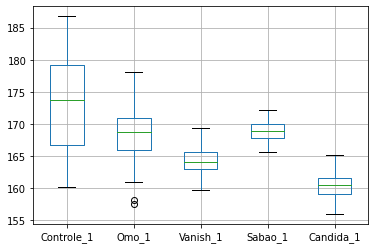

In [ ]:
import matplotlib.pyplot as plt

i_1= pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido_1.csv')

plt.figure()
i_1.boxplot(['Controle_1','Omo_1','Vanish_1','Sabao_1','Candida_1'])

plt.show()

**Anova - Tecido 2**

In [ ]:
aov_2 = pg.anova(data = df_2, dv = 'Valores de Cinza', between = 'Grupos', detailed = True) # teste ANOVA para Tecido_2
aov_2

,Source,SS,DF,MS,F,p-unc,np2
0,Grupos,103454.108846,4,25863.527212,7793.253962,0.0,0.976659
1,Within,2472.436785,745,3.318707,NaN,NaN,NaN


**Teste Tukey - Tecido 2**

In [ ]:
pt_2 = pg.pairwise_tukey(data = df_2, dv = 'Valores de Cinza', between = 'Grupos', effsize = 'cohen') # Teste Tukey para verificar a diferença estatística entre os grupos - Tecido 2.
pt_2.round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,Candida_2,Controle_2,180.868,192.704,-11.836,0.21,-56.266,0.0,-6.497
1,Candida_2,Omo_2,180.868,173.400,7.468,0.21,35.504,0.0,4.100
2,Candida_2,Sabao em barra_2,180.868,157.476,23.393,0.21,111.205,0.0,12.841
3,Candida_2,Vanish_2,180.868,182.922,-2.054,0.21,-9.764,0.0,-1.127
4,Controle_2,Omo_2,192.704,173.400,19.304,0.21,91.770,0.0,10.597
5,Controle_2,Sabao em barra_2,192.704,157.476,35.228,0.21,167.471,0.0,19.338
6,Controle_2,Vanish_2,192.704,182.922,9.782,0.21,46.502,0.0,5.370
7,Omo_2,Sabao em barra_2,173.400,157.476,15.924,0.21,75.701,0.0,8.741
8,Omo_2,Vanish_2,173.400,182.922,-9.522,0.21,-45.268,0.0,-5.227
9,Sabao em barra_2,Vanish_2,157.476,182.922,-25.447,0.21,-120.970,0.0,-13.968


**Gráfico - Tecido 2**

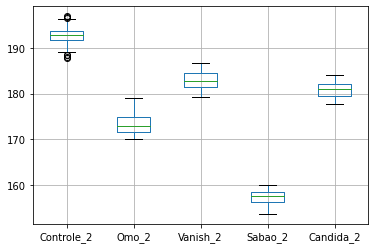

In [ ]:
i_2= pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido%202.csv')

plt.figure()
i_2.boxplot(['Controle_2','Omo_2','Vanish_2','Sabao_2','Candida_2'])

plt.show()

**Homoscedasticidade Tecido Total 1**

In [5]:
pg.homoscedasticity(Total1, dv = 'Valores de Cinza', group= 'Grupos', method = 'levene', alpha=0.05)

,W,pval,equal_var
levene,171.045526,5.045165e-128,False


**Welch ANOVA Tecido Total 1:**

In [9]:
import pingouin as pg

waov_Total1 = pg.welch_anova(data = Total1, dv = 'Valores de Cinza', between = 'Grupos') # teste ANOVA para Tecido Total 1
waov_Total1

,Source,ddof1,ddof2,F,p-unc,np2
0,Grupos,4,1109.183768,1510.076958,0.0,0.72


**Teste Games-Howell Tecido Total 1**

In [10]:
pt_Total1 = pg.pairwise_gameshowell(data = Total1, dv = 'Valores de Cinza', between = 'Grupos', effsize = 'cohen') # Teste Tukey para verificar a diferença estatística entre os grupos - Tecido 1.
pt_Total1.round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,cohen
0,Candida1,Controle1,161.997,173.046,-11.049,0.214,-51.627,632.438,0.0,-3.438
1,Candida1,Omo1,161.997,168.974,-6.976,0.121,-57.691,891.970,0.0,-3.842
2,Candida1,Sabao1,161.997,168.435,-6.438,0.111,-58.033,825.282,0.0,-3.865
3,Candida1,Vanish1,161.997,164.647,-2.650,0.117,-22.658,874.467,0.0,-1.509
4,Controle1,Omo1,173.046,168.974,4.073,0.211,19.324,602.897,0.0,1.287
5,Controle1,Sabao1,173.046,168.435,4.611,0.205,22.472,551.131,0.0,1.496
6,Controle1,Vanish1,173.046,164.647,8.399,0.208,40.288,582.014,0.0,2.683
7,Omo1,Sabao1,168.974,168.435,0.538,0.104,5.151,861.267,0.0,0.343
8,Omo1,Vanish1,168.974,164.647,4.327,0.111,39.035,894.661,0.0,2.599
9,Sabao1,Vanish1,168.435,164.647,3.789,0.100,37.941,883.404,0.0,2.527


**Gráfico Tecido Total 1**

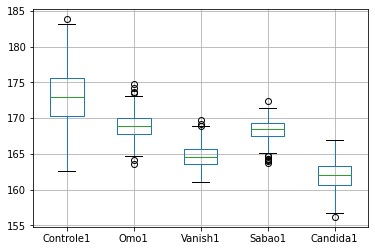

In [13]:
import matplotlib.pyplot as plt

plt.figure()
Total1_Gráfico.boxplot(['Controle1','Omo1','Vanish1','Sabao1','Candida1'])

plt.show()

##**Conclusões:**